**In this notebook, I look at the polarity of the posts and comments and explore a hypothesis I had about posts that are very negative or positive.**

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_colwidth',1000)
import seaborn as sns
%matplotlib inline
import itertools
import re
import string

In [3]:
SIA = SentimentIntensityAnalyzer()

Sentiment Intensity Analyzer returns a dictionary of scores (positive, negative and neutral). I am using the compound of this score which is the aggregation of the three other scores.

In [4]:
def polarity(row):
    SA = SIA.polarity_scores(row)
    return SA["compound"]

In [5]:
comments = pd.read_pickle("comments.pkl")

I decided to only look at the polarity of comments with posts that have 5 or more comments. I also will only look at the polarity of the first 5 comments.

In [6]:
comments_polarity = comments[comments.com5.notnull()]
comments_polarity = comments_polarity.reset_index(drop=True)
comments_polarity.head()

,_id,com0,com1,com10,com100,com101,com102,com103,com104,com105,...,com93,com94,com95,com96,com97,com98,com99,id,type,total_comments
0,591e0003f7327e5f6df05984,"Illustrator here, the well of creativity dries up whenever things get worse. Hell, those days I'm even afraid to put a pencil, pen or any other tool to paper because I know I won't be able to put anything decent on there anyway, so I won't even try. I used to be full of ideas and motivation to execute them, but now I struggle to come up with the simplest thing to draw..","I'm an artist and it has *greatly* affected me; I've noticed my great trouble with creative work now and as a result I do more 'traditional work' which requires just observation and not imaginative thought. \n\n\nAnd that really upsets me. It's such a big part of me, and I'm holding on to it, I'm *afraid* of losing that. \n","I'm not the most creative person myself,but I feel the same way sometimes. For me, it's like my somewhat creative ""flow"" is just gone or not there.",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4e2aww,depression,"Illustrator here, the well of creativity dries up whenever things get worse. Hell, those days I'm even afraid to put a pencil, pen or any other tool to paper because I know I won't be able to put anything decent on there anyway, so I won't even try. I used to be full of ideas and motivation to execute them, but now I struggle to come up with the simplest thing to draw.. I'm an artist and it has *greatly* affected me; I've noticed my great trouble with creative work now and as a result I do more 'traditional work' which requires just observation and not imaginative thought. \n\n\nAnd that really upsets me. It's such a big part of me, and I'm holding on to it, I'm *afraid* of losing that. \n I'm not the most creative person myself,but I feel the same way sometimes. For me, it's like my somewhat creative ""flow"" is just gone or not there. I was a pretty good poet in grade 5. 15 years later, I can't write a thing. fuck yeah it has, im too fuckin nervous to be creative around peo..."
1,591e0005f7327e5f6df05986,"Get out of the house first thing in the morning.. (It takes me 5 hours to get myself out lol, that's the hardest part of the day) . Sit at a library or a coffeeshop with wifi while you look for a job. or at a public park or something if you're in someplace with warm weather. \n\nStaying at home makes each day the same. Find a new place to work from everyday. If you just get out, you can wing it everyday, and not have to make a fixed schedule, and still get something productive done. Also, you won't have to clean your house that often! \n\n\n\n","I would start by adding in one productive, happy activity for at least half an hour a day. Cleaning your apartment and watching a movie are actually pretty great things to add in between all the crying, I should try that. Do you work or study? If not, why don't you try something related to fitness or creativity? I don't know if this is appropriate to post on /r/depression, but you should maybe try checking out /r/90daysgoal/ ? I haven't joined in on a round in a while, and you don't necessarily have to, but it's a very positive place full of examples of daily/weekly schedules and goals you might look forward to reading. Best of luck, keep strong.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4e2as1,depression,"Get out of the house first thing in the morning.. (It takes me 5 hours to get myself out lol, that's the hardest part of the day) . Sit at a library or a coffeeshop with wifi while you look for a job. or at a public park or something if you're in someplace with warm weather. \n\nStaying at home makes each day the same. Find a new place to work from everyday. If you just get out, you can wing it everyday, and not have to make a fixed schedule, and still get something productive done. Also, you won't have to clean your house that often! \n\n\n\n I would start by adding in one productive, happy ac

In [7]:
comments_polarities = comments_polarity[["com1", "com2", "com3", "com4", "com5"]].applymap(lambda x: polarity(x))

In [8]:
comments_polarities = comments_polarities.reset_index(drop=True)

In [9]:
comments_polarities.head(5)

,com1,com2,com3,com4,com5
0,-0.1761,0.6908,-0.0754,-0.1970,-0.9245
1,0.9825,0.9775,0.8920,0.9894,0.9200
2,-0.3400,0.7311,0.0000,-0.9337,0.0000
3,-0.2144,0.5719,-0.6696,0.4215,0.8640
4,-0.9982,0.6369,0.9039,0.9296,0.9314


In [10]:
comments_polarities["pmean"]= comments_polarities.mean(axis=1)


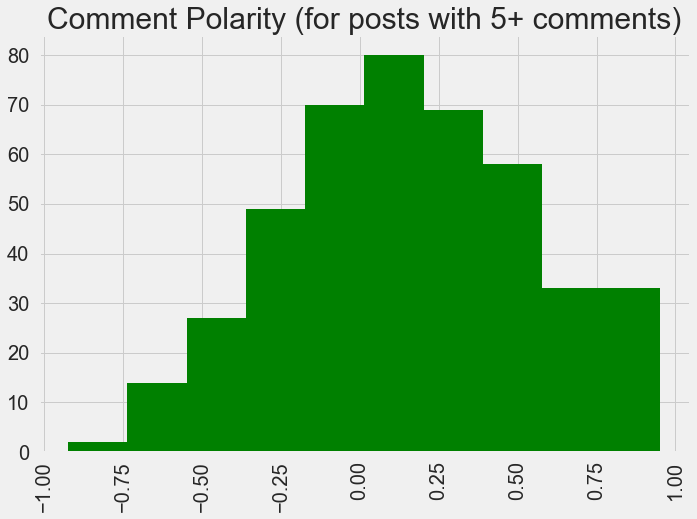

In [52]:
sns.set_context("talk")
plt.style.use('fivethirtyeight')
comments_polarities["pmean"].hist(bins=10, color="green")

plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

plt.title("Comment Polarity (for posts with 5+ comments)", fontsize=30)

Comments tends to be mostly neutral or positive, which probably attests to the community mostly wanting to help and heavy moderation.

In [53]:
comments_polarity[comments_polarities.pmean < -.4][["com1","com2", "com3", "id", "type" ]].head(2)

,com1,com2,com3,id,type
20,"Yep. Mostly myself. Sometimes it turns outwardd.\n\nI think some famed philosopher said something about ""all knowledge is self knowledge"". That applies to evwrything. If you hate everything, it's likelybecause you hate yourself.","I just feel lonely as fuck, I don't hate people. I am easily spurred to anger, Its why I am starting to avoid people. \n\nI am more angry at myself than other people. \n\nI really don't like hating people, some people can be rude and people will not understand what it is like to be tortured as a kid.","Yes. Absolutely it does. \n\nOnce I started taking Prozac, I stopped arguing with my wife every day. So I think that helped reduce the anger. \n\nBut I'm still hate everything. Especially myself. \n",4dtm1f,depression
23,"It's only awkward if you make it awkward. I'm sure if you're getting drinks at a bar there will be TV's around you. Say something about what you're watching and just keep branching off topics. Talk about your childhood, funny shit that's happened to you and keep a smile on your face.",I believe in you homie,"I think you should get all this out of your system, and then remind yourself that you are, in fact, exaggerating, and none of this is going to happen. I feel the same way too before social encounters -- it's going to be horrible, I'll be an awkward idiot, the conversation will go terribly, and the whole thing will be a disaster.\n\nWhen I actually get to the encounter, though, it almost never ends up going that way. For one thing, you have another person there who is also nervous, and who will also be doing their best to have a good time with you. So you don't have to shoulder the burden alone!\n\nTimes when I have had a disastrous encounter, though, have been when I've continued the negative self-talk all the way through the experience. That shit does make a difference. You can talk yourself into being terrible company. But it's not necessary at all. So you have to ask yourself, do I *want* this evening to suck? If not, then don't ensure that it will suck with negative talk. Just ...",4dt9or,depression


The most negative comments seem to be a mixture of describing bad (but education) pasts/situations and self-loathing.

**Now let's move on to look at post polarity:**

In [11]:
posts = pd.read_pickle("posts.pkl")

In [12]:
posts["polarity"] = posts.total_text.apply(lambda x: polarity(x))

In [31]:
posts.polarity.describe()

count    4313.000000
mean       -0.275931
std         0.762572
min        -0.999900
25%        -0.953800
50%        -0.680800
75%         0.557400
max         0.999200
Name: polarity, dtype: float64

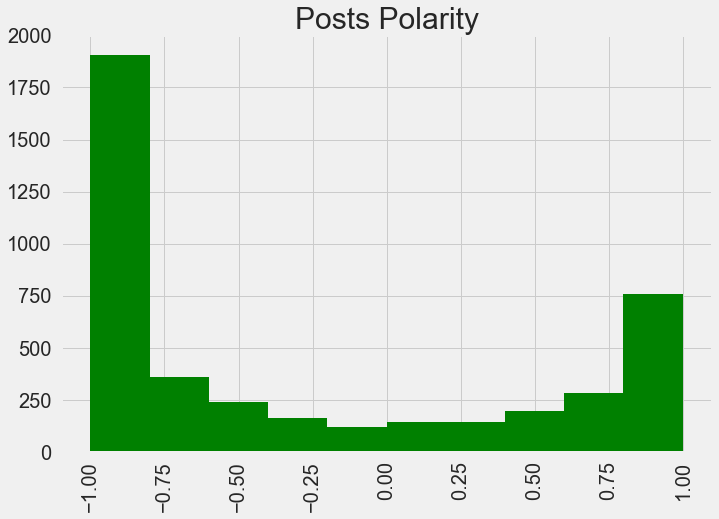

In [32]:
posts["polarity"].hist(bins=10, color="green")

plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

plt.title("Posts Polarity", fontsize=30)

That's really interesting. I wonder why we see somewhat of a bimodal distribution of post polarity? The clusting in very negative polarity makes sense, but why are there also so many very positive posts? Let's explore this more.

First, let's grab roughly 400 each of the most negative and the most positive posts.

In [13]:
lowest = posts[posts.polarity < -.99]
lowest.shape

(392, 13)

In [14]:
highest = posts[posts.polarity > .94]
highest.shape

(385, 13)

Let's sample some of these posts to get an understanding of what makes a post negative and what makes a post positive.

In [56]:
lowest[["total_text", "Type"]].sample(10)

,total_text,Type
4302,"Girlfriend not texting back I am currently in a long distance relationship, and whenever she doesn't text back or my messages aren't delivering I get this really weird fear that she's died for some reason. Like just this nagging fear and worry in the back of my head just enough so that it's constantly affecting me, but not debilitating me. I've had this same fear in past relationships too, but it just especially scares me just because it almost seems semi logical to conclude its very possible she could be dead, and the thought of her being dead terrifies me beyond belief. Does anyone else have this fear?",anxiety
1380,"Revisiting memories from adolescence has me feeling like I'm on a one-way road to suicide. My stomach physically hurts with anger, resentment, and embarrassment. I have spent the past few weeks revisiting memories from my adolescence because of a course I'm taking in college. I have been realizing that I might have been psychologically abused by my parents. My parents have always been loving parents on the outside. We seem like a normal family. We have a wonderful relationship(?) 85% of the time; we have so many wonderful memories together. I love them with all of my heart, but I'm so confused about how. I'm confused to the point where I feel like my mind is ripped apart. I'm angry at myself because I sincerely thought that they were normal parents up until several weeks ago and that I was the screw-up, causing them to act the way they did. I can feel my desire to kill myself coming back (haven't felt it in probably ~6 months), and that's really scaring me. \n\nI don't think I *nee...",suicide
2153,"Can't Tell If Brain Tumor Or Anxiety :/ Hey everybody,\nSo a month ago the Brussels attacks had just happened. My friend was in Brussels for March Break, I talked to him all morning about how he was so lucky to make it out and not be caught up in the chaos. I left a comment on the top voted post about the attacks and headed off to 2nd period.\n\nI was in 2nd period and I see I got a reply to the comment, I opened it and it was a counter argument talking about how IsIs want us to fight back so they have a reason to keep terrorizing the world. Mid way reading through it my right side went numb (My face wasn't dropping and I could speak clearly.) I felt numb, overwhelmed, confused,I told myself that I was going to die and upset.\n\nI ended up going to the doctors on the same day, before that my school first aid assistance said she didn't think It was a stroke. My doctor checked me out and said she couldn't find anything wrong with me but to go to CHEO (Children's Hospital Of Ottawa) t...",suicide
2149,"Do I have some sort of anxiety disorder? I'm 20, almost 21, and come this fall, I'll be a senior in college. My mental and physical health started to decline when I was about 17. \n\nI'll start with my physical health problems:\nI lost a lot of weight very quickly for prom in 2013, but that turned into a full-blown eating disorder. My weight has been yo-yoing ever since then. I'll repeatedly gain and lose the same 20-25 pounds every two months, which is obviously a result of my binge-restrict eating habits. My thyroid has slowed down as a result and my iron levels are insufficient. I'll sleep for 11-12 hours every night for two or three weeks, and for the next two or three weeks, I'll get 3-5 hours of sleep a night. \n\nNow for my mental health problems: \nI am seriously obsessed with my body. I'm constantly volleying between counting every single calorie that I consume, to eating everything in sight without a care. The only constant is that I deeply hate myself. I think I'm fat, ...",suicide
3638,"Confused and afraid Christ, I don't even know where to begin with this. Honestly I feel kind of stupid posting this here as I've calmed down a bit, but I realize that train of thought is counterproductive. If it matters, I'm 16 years old nearing the end of my sophomore year in high school.\n\nI have a cou

These posts definitely seem very dismal, people seem very lost, and feature lots of ranting, negative language and cursing.

In [57]:
highest[["total_text", "Type"]].sample(10)

,total_text,Type
3487,"Looking for a new psychologist since I can't go to my old one anymore. And well...is it bad to decide NOT to go to a certain psychologist because of the stuff they post online? So, my college offered free sessions with a psychologist. All my sessions have run out so I have to find someone that takes my insurance. Anyway, my insurance gave me a name of a psychologist 15 minutes away from me.\n\nHe has good reviews, but...his social media is public. And well, he just makes super judge-y posts online. Making fun of people for how they dress. Comes off as really racist too....and well, seems like a really mean person.\n\nErrrr, would you go to him regardless? Cuz part of me is like, ""well, that's just how he is online. He has to do his job when he sees me and be respectful."" But at the same time, I feel like he'll be silently judging me...maybe he'd make fun of me on his social media.\n\nI just...idk.\n\nI asked for more names, but they gave me 2 other psychologists that I don't think ...",anxiety
77,"What natural remedies have worked for you? I'm in my fourth month of depression. I frequently get dark thoughts about ending it and really want to get out of this hole. \nI exercise regularly and eat a balanced diet. Sometimes I meditate and do yoga. But these things arent helping me with self content and calmness. I was seeing a therapist but am not anymore as I quit uni and no longer have access.\nI don't really want to resort to medication if I can help it. \nHave you found anything that helped for you? Such as certain vitamins, online content, ways of reaching out and getting better etc.? Activities you found helped? Thanks for taking the time to chat.",depression
1591,"What's the point anymore? I lost all hope and idealism I had When I was 20 I fell in love with a wonderful girl. I was with her for 6 years and I was so incredibly happy. She broke my heart when she cheated on me and I lost part of myself. When I was 28 I met another girl and somehow fell in love with her as well. We were together 7 years and got married inbetween. She broke my heart as well and left me. I lost all hope and idealism of ever having a loving partner.\n\nWhat's the point if they all end up leaving me after a few years? I'm not a bad person and I don't deserve this unhappiness. What's the point if it's all so artificial? Being together a few years and then the relationship dies. I'm 35 now, already past the prime of my life and I have nothing. I always thought I'd be married with a woman I love and having a family to take care of. But that didn't happen. I've just been destroyed emotionally twice by two women who meant everything to me. I would've taken a bulelt for th...",suicide
2074,"Strange Reflex - Anyone Else? **Preamble**: I am scientifically investigating if there is a link between anxiety and this reflex of mine. Any help would be appreciated!\n\n* Age: 25\n* Sex: M\n* Height: 5'10""\n* Weight: 140 lbs\n* Race: Asian\n* Any existing relevant medical issues: Hyperhidrosis (palmar & plantar), anxiety (chicken or egg with the hyperhidrosis)\n* Current medications: glycopyrrolate for hyperhidrosis\n\n**Description**: \nI can perform a reflex (as I term it, as I can voluntarily control it) which produces what feels like ""activated nerves"" and starts either at the base of the spine/groin area and travels upwards along the spine. It also may be produced starting at the neck part of the spine and emanates downwards. The effect makes me feel ""heightened"" or more alert and it requires effort to keep the ""reflex"" activated, although I can willingly turn it on/off.\nI have been able to activate this reflex since I was a pre-teen.\n\n**Addendum**: \n* I have performed ...",suicide
3684,"Does it ever hit you that people without anxiety can do things so easily? For example, my parents are going away for a week later this year. I don't want to be at home alone, but I can't sleep out of my house, I haven't slept out in at least 

These are definitely not "positive", but definitely more netural tone than the negative ones. Overall, these posts tend to lean more optimistic and solution-oriented.

In [58]:
lowest.Type.value_counts()

suicide       157
depression    126
anxiety       109
Name: Type, dtype: int64

In [59]:
highest.Type.value_counts()

suicide       159
depression    126
anxiety       100
Name: Type, dtype: int64

Not a whole lot of difference in post type between the two groups (remember that there were more suicide posts to begin with).

While looking at the differences between negative and positive polarity posts, I ended up down a rabbit hole in which I looked at generic vs non-generic drug and coping strategies. Generic coping or medicine would be words like "doctor" or "exercise". While non-generic would be specific drug names like "Cymbalta", or specific types of treatment like "transcental meditation". My final code for exploring these posts is reproduced here.




In [15]:
specific_drug =  ["desvenlafaxine", "Pristiq", "Khedezla", "duloxetine" , "Cymbalta", "levomilnacipran", "Fetzima",
                "venlafaxine", "Effexor", "amitriptyline", "Anafranil", "clomipramine" , "Norpramin", "doxepin",
                  "imipramine", "Tofranil", "protriptyline" , "trimipramine", "Surmontil", "Maprotiline",
                  "Bupropion", "Wellbutrin", "Forfivo", "Aplenzin" , "vilazodone", "Viibryd" , "nefazodone",
                  "trazodone", "Oleptro",  "Marplan", "isocarboxazid", "phenelzine", "nardil", "selgiline", "emsam",
                  "tranylcypromine", "parnate", "SAMe", "sertraline", "zoloft", "prozac", "sarafem", "citalopram",
                  "celexa", "escitalopram", "lexapro", "paroxetine", "paxil", "pexeva", "brisdelle", "fluvoxamine", "luvox",
                  "xanax", "Alprazolam", "valium", "lyrica", "seroquel"]
generic_medicine = ["medication", "medicate", "doctor", "psychiatrist"]
generic_treatment = ["meditation","exercise"]
specific_treatment = ["transcendental","Transcendental", "lifting", "weights", "jogging", "vipassana", "yoga" ]

In [16]:
specific_drugs = 0
specific_treat = 0
generic_med = 0 
generic_treat = 0 

words = []
for x in highest.total_text:
    if type(x) != str :
        x = x.decode('utf-8')
    x = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',' ', x)
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    x = regex.sub('', x)
    x = x.lower()
    x = x.split(" ")
    try:
        lemmatizer = WordNetLemmatizer()
        lemmatizer_fun = lambda x: lemmatizer.lemmatize(x, get_wordnet_pos(x))

        lemmatizer_fun_outer = lambda x: list(map(lemmatizer_fun, x))
        x= generalize_fun(x, lemmatizer_fun_outer)
    except:
        x = x

    for y in x:
        words.append(x)
words = list(itertools.chain(*words))

for x in words:
    if x in specific_drug:
            specific_drugs += 1
    if x in generic_medicine:
            generic_med +=1
    if x in generic_treatment:  
            generic_treat +=1
    if x in specific_treatment:  
            specific_treat +=1

In [17]:
specific_drugs_low = 0
specific_treat_low = 0
generic_med_low = 0 
generic_treat_low = 0 

words = []
for x in lowest.total_text:
    if type(x) != str :
        x = x.decode('utf-8')
    x = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',' ', x)
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    x = regex.sub('', x)
    x = x.lower()
    x = x.split(" ")
    try:
        lemmatizer = WordNetLemmatizer()
        lemmatizer_fun = lambda x: lemmatizer.lemmatize(x, get_wordnet_pos(x))

        lemmatizer_fun_outer = lambda x: list(map(lemmatizer_fun, x))
        x= generalize_fun(x, lemmatizer_fun_outer)
    except:
        x = x

    for y in x:
        words.append(x)
words = list(itertools.chain(*words))

for x in words:
    if x in specific_drug:
            specific_drugs_low += 1
    if x in generic_medicine:
            generic_med_low +=1
    if x in generic_treatment:  
            generic_treat_low +=1 
    if x in specific_treatment:  
            specific_treat_low +=1

(array([      0.,   20000.,   40000.,   60000.,   80000.,  100000.,
         120000.,  140000.,  160000.,  180000.]),
 <a list of 10 Text yticklabel objects>)

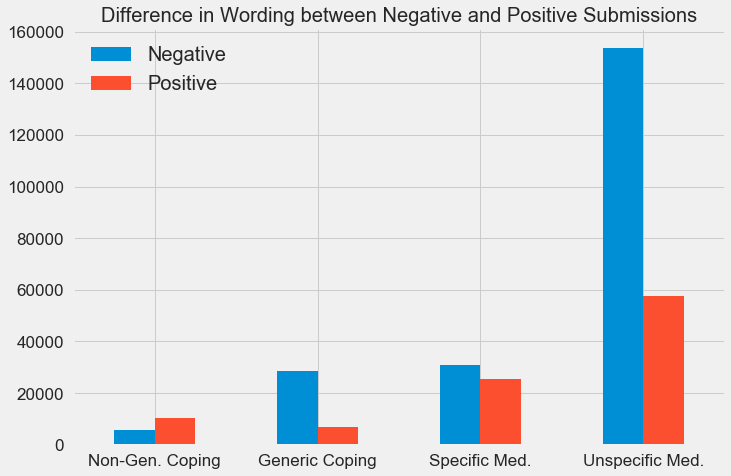

In [23]:
generic_nongeneric = pd.DataFrame([[specific_treat_low, generic_treat_low, specific_drugs_low, generic_med_low], [specific_treat, generic_treat, specific_drugs, generic_med]], 
             columns=["Non-Gen. Coping", "Generic Coping", "Specific Med.", "Unspecific Med."], index=["Negative", "Positive"])
sns.set_context("talk")
plt.style.use('fivethirtyeight')
generic_nongeneric.transpose().plot(kind="bar", label={0: "Negative", 1: "Positive"})
plt.legend(fontsize=20)
plt.title("Difference in Wording between Negative and Positive Submissions")
plt.xticks(fontsize=17, rotation=360)
plt.yticks(fontsize=17)

There results are quite intesting. Really neagtive posts use way more generic coping and generic drug/medical references then the most positive do. For specific medicine references it is about equal usage, and the most positive posts use almost double the amount of non-generic coping references. What to make of this? It's hard to say. It is possible that the polarity difference might signify depression or anxiety severity or that the more positive posts are people sharing how they got over their disorder or are just farther along in treating it. It is also possible that the more positive posts are representive of people who are very driven to get over their disorder or have certain character traits that cause them to look more at the specifics. Maybe the more negative posts signify that the person is really lost and know they should try things like "exercise" or "antidepressants" but don't know how to move forward with either of those.